In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#seed for reproduction
np.random.seed(42)

In [44]:
#download data set
path = kagglehub.dataset_download("alessiocorrado99/animals10")

Using Colab cache for faster access to the 'animals10' dataset.


In [45]:
#target img size
IMG_SIZE = 128
#storage lists
X = []
y = []

#animal class names
class_names = [
    "cane", "cavallo", "elefante", "farfalla", "gallina",
    "gatto", "mucca", "pecora", "ragno", "scoiattolo"
]
#loop each folder
for label, cls in enumerate(class_names):
    cls_path = os.path.join(path, "raw-img", cls)

    if not os.path.isdir(cls_path):
        continue
#load fixed num of imgs
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img = img_to_array(img)
        #store img and label
        X.append(img)
        y.append(label)
#convert to numpy arrays
X = np.array(X) / 255.0
y = np.array(y)

In [46]:
#split training
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)
#split again for more training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full,
    test_size=0.15,
    random_state=42,
    stratify=y_train_full
)

In [47]:
#initialize
cnn2 = tf.keras.models.Sequential()
#1st layer
cnn2.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=7, activation="relu",
    padding="same", input_shape=(IMG_SIZE, IMG_SIZE, 3)
))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#2nd layer
cnn2.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation="relu", padding="same"))
cnn2.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation="relu", padding="same"))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#3rd laywe
cnn2.add(tf.keras.layers.Conv2D(256, kernel_size=3, activation="relu", padding="same"))
cnn2.add(tf.keras.layers.Conv2D(256, kernel_size=3, activation="relu", padding="same"))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#flatten into 1D vector
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dense(128, activation="relu"))
cnn2.add(tf.keras.layers.Dense(64, activation="relu"))
cnn2.add(tf.keras.layers.Dense(10, activation="softmax"))  # 10 animals

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
cnn2.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,513,802 (36.29 MB)

 Trainable params: 9,513,802 (36.29 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
cnn2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [50]:
#train
history2 = cnn2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.1920 - loss: 2.2531 - val_accuracy: 0.2714 - val_loss: 2.0497
Epoch 2/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.2843 - loss: 2.0018 - val_accuracy: 0.3406 - val_loss: 1.8839
Epoch 3/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.3946 - loss: 1.7254 - val_accuracy: 0.4575 - val_loss: 1.5895
Epoch 4/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5093 - loss: 1.4120 - val_accuracy: 0.5207 - val_loss: 1.4144
Epoch 5/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6057 - loss: 1.1299 - val_accuracy: 0.5509 - val_loss: 1.3372
Epoch 6/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7016 - loss: 0.8748 - val_accuracy: 0.5578 - val_loss: 1.3796
Epoch 7/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7971 - loss: 0.6086 - val_accuracy: 0.5671 - val_loss: 1.4182
Epoch 8/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8769 - loss: 0.3759 - val_acc

In [51]:
#evalulate
score2 = cnn2.evaluate(X_test, y_test)

print("Total loss on Testing Set:", score2[0])
print("Accuracy of Testing Set:", score2[1])

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5531 - loss: 3.5243
Total loss on Testing Set: 3.614034414291382
Accuracy of Testing Set: 0.5459638237953186


In [52]:
#3 test samples
X_new = X_test[:3]
#predict probabilites
y_proba = cnn2.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
#display pred class names
np.array(class_names)[y_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


array(['ragno', 'farfalla', 'cane'], dtype='<U10')

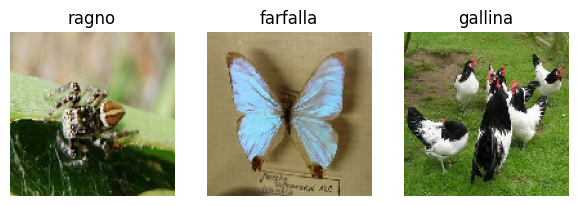

In [53]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(class_names[y_test[index]])
plt.show()